In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folder_name = "results"
supervised_metrics = ["F1", "ami", "ari"]
unsupervised_metrics = ["silhouette", "db", "dunn"]
metrics = supervised_metrics + unsupervised_metrics

## Incomplete multiview algorithms

In [3]:
filelame = "incomplete_algorithms_evaluation.csv"
file_path = os.path.join(folder_name, filelame)
results = pd.read_csv(file_path)
print("results", results.shape)
results.head()

results (1198, 43)


,alg,dataset,n_samples,% incomplete samples,time,execution,ACC,MCC,F1,precision,...,sub_completeness,sub_silhouette,sub_vrc,sub_db,sub_dunn,sub_random_acc,sub_random_f1,sub_label_sizes,sub_relative_label_sizes,comments
0,MOFA,nutrimouse_genotype,40,0,0.237487,0,0.925,0.859727,0.918919,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MOFA,nutrimouse_genotype,40,0,0.215971,1,0.800,0.603023,0.809524,0.772727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MOFA,nutrimouse_genotype,40,0,0.215720,2,0.650,0.327327,0.562500,0.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MOFA,nutrimouse_genotype,40,0,0.213480,3,0.525,0.059868,0.344828,0.555556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MOFA,nutrimouse_genotype,40,0,0.213492,4,0.550,0.140028,0.666667,0.529412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
monet_results = results[results["alg"] == "MONET"]
monet_results.loc[monet_results["n_clustered_samples"] == monet_results["n_samples"],
                  [f"sub_{i}" for i in metrics]] = monet_results.loc[monet_results["n_clustered_samples"] == monet_results["n_samples"], metrics].values
monet_results.loc[:, metrics] = monet_results.loc[:, [f"sub_{i}" for i in metrics]].values
monet_results.loc[:, "alg"] = "MONET_wm"
results = pd.concat([results, monet_results])

In [15]:
results[["alg", "dataset", "% incomplete samples"] + supervised_metrics].groupby(["dataset", "alg", "% incomplete samples"]).apply

F1       ami       ari
dataset             alg  % incomplete samples                              
nutrimouse_diet     DFMF 0                     0.425001  0.153043  0.096596
                         10                    0.384465  0.091684  0.052983
                         20                    0.388441  0.076143  0.044853
                         30                    0.368806  0.080377  0.045522
                         40                    0.387780  0.070787  0.042909
...                                                 ...       ...       ...
nutrimouse_genotype SUMO 50                    0.582446  0.015008  0.020391
                         60                    0.539056  0.007164  0.008376
                         70                    0.576229  0.021444  0.022064
                         80                    0.569893 -0.002161 -0.001354
                         90                    0.519291  0.002021  0.004996

[140 rows x 3 columns]

In [17]:
import numpy as np

In [20]:
results[["alg", "dataset", "% incomplete samples"] + supervised_metrics].groupby(["dataset", "alg", "% incomplete samples"]).apply(lambda x: f"{np.mean(x)}+-{np.std(x)}")

dataset              alg   % incomplete samples
nutrimouse_diet      DFMF  0                       0.22488002342533875+-F1     0.037932\nami    0...
                           10                      0.17637740610669203+-F1     0.044226\nami    0...
                           20                      0.16981199645475667+-F1     0.029640\nami    0...
                           30                      0.1649018343748607+-F1     0.046822\nami    0....
                           40                      0.16715863766935884+-F1     0.048306\nami    0...
                                                                         ...                        
nutrimouse_genotype  SUMO  50                      0.20594832663273077+-F1     0.079794\nami    0...
                           60                      0.18486553321644197+-F1     0.083393\nami    0...
                           70                      0.20657871652261334+-F1     0.076728\nami    0...
                           80              

In [112]:
results_table = results[["alg", "dataset", "% incomplete samples"] + supervised_metrics].groupby(["dataset", "alg", "% incomplete samples"])
# results_table = results_table.agg(lambda x: f"{np.mean(x).round(2)}\u00B1{np.std(x).round(2)}")
results_table = results_table.mean().round(2)
results_table = results_table.unstack("% incomplete samples")
results_table.head()

F1                                             
% incomplete samples        0     10    20    30    40    50    60    70   
dataset         alg                                                        
nutrimouse_diet DFMF      0.43  0.38  0.39  0.37  0.39  0.40  0.35  0.39  \
                MOFA      0.53  0.51  0.55  0.48  0.49  0.41  0.43  0.37   
                MONET     0.27  0.27  0.25  0.31  0.30  0.32  0.34  0.32   
                MONET_wm  0.15  0.18  0.20  0.29  0.27  0.29  0.30  0.31   
                MSNE      0.32  0.35  0.33  0.35  0.35  0.36  0.33  0.32   

                                      ...   ari                                 
% incomplete samples        80    90  ...    0     10    20    30    40    50   
dataset         alg                   ...                                       
nutrimouse_diet DFMF      0.37  0.36  ...  0.10  0.05  0.04  0.05  0.04  0.03  \
                MOFA      0.40  0.35  ...  0.23  0.25  0.25  0.18  0.13  0.11   
                MONET     0.29  0.31  ...  0.03  0.06  0.07  0.18  0.13  0.15   
                MONET_wm  0.28  0.30  ... -0.02  0.03  0.06  0.17  0.12  0.15   
                MSNE      0.34  0.36  ... -0.02  0.01 -0.02  0.01 -0.00  0.01   

                                                  
% incomplete samples        60    70    80    90  
dataset         alg                               
nutrimouse_diet DFMF      0.05  0.07  0.07  0.07  
                MOFA      0.08  0.08  0.08  0.06  
                MONET     0.15  0.14  0.09  0.11  
                MONET_wm  0.14  0.14  0.09  0.12  
                MSNE     -0.00 -0.02 -0.01  0.00  

[5 rows x 30 columns]

In [115]:
results_table.loc["nutrimouse_genotype"].style.background_gradient(axis= 0)

In [101]:
for dataset in results_table.index.get_level_values(0).unique():
    results_table.loc[dataset].style = results_table.loc[dataset].style.highlight_max(axis = 0, props="font-weight:bold")
results_table

AttributeError: can't set attribute 'style'

In [70]:
results_table.style.highlight_max(axis = 0, props="font-weight:bold")

In [56]:
from IPython.display import display, HTML

display(HTML(results_table.to_html()))

#### Nutrimouse genotype

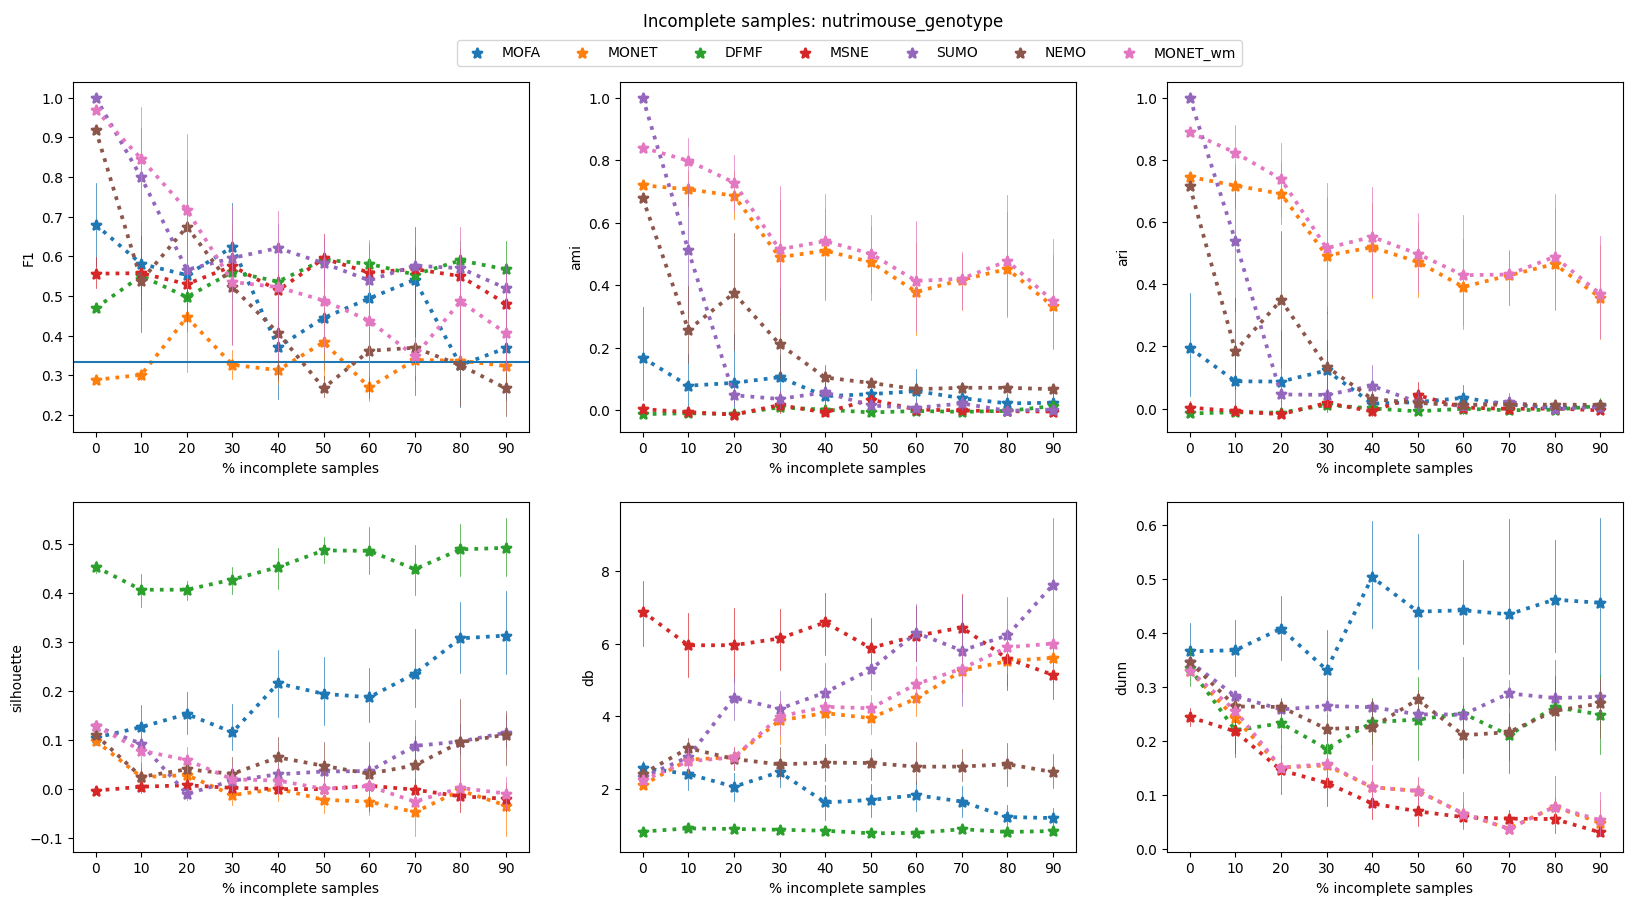

In [5]:
dataset_name = "nutrimouse_genotype"
dataset_results = results[results["dataset"] == dataset_name]
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows,ncols, figsize = (20, 10))
fig.suptitle(f"Incomplete samples: {dataset_name}", y= 0.95)
for metric, ax in zip(metrics, axes.flatten()):
    sns.pointplot(data= dataset_results, x= "% incomplete samples", y= metric, hue= "alg", seed= 42, errwidth= 0.5, ax = ax, linestyles= "dotted", markers= "*")
    if metric == "ACC":
        ax.axhline(dataset_results["random_acc"].iloc[0])
    elif metric == "F1":
        ax.axhline(dataset_results["random_f1"].iloc[0])
fig.legend(*ax.get_legend_handles_labels(), ncol=dataset_results["alg"].nunique(), loc= [0.28,0.927])
[[c.get_legend().remove() for c in ax if c.get_legend() is not None] for ax in axes]
plt.show()

#### Nutrimouse diet

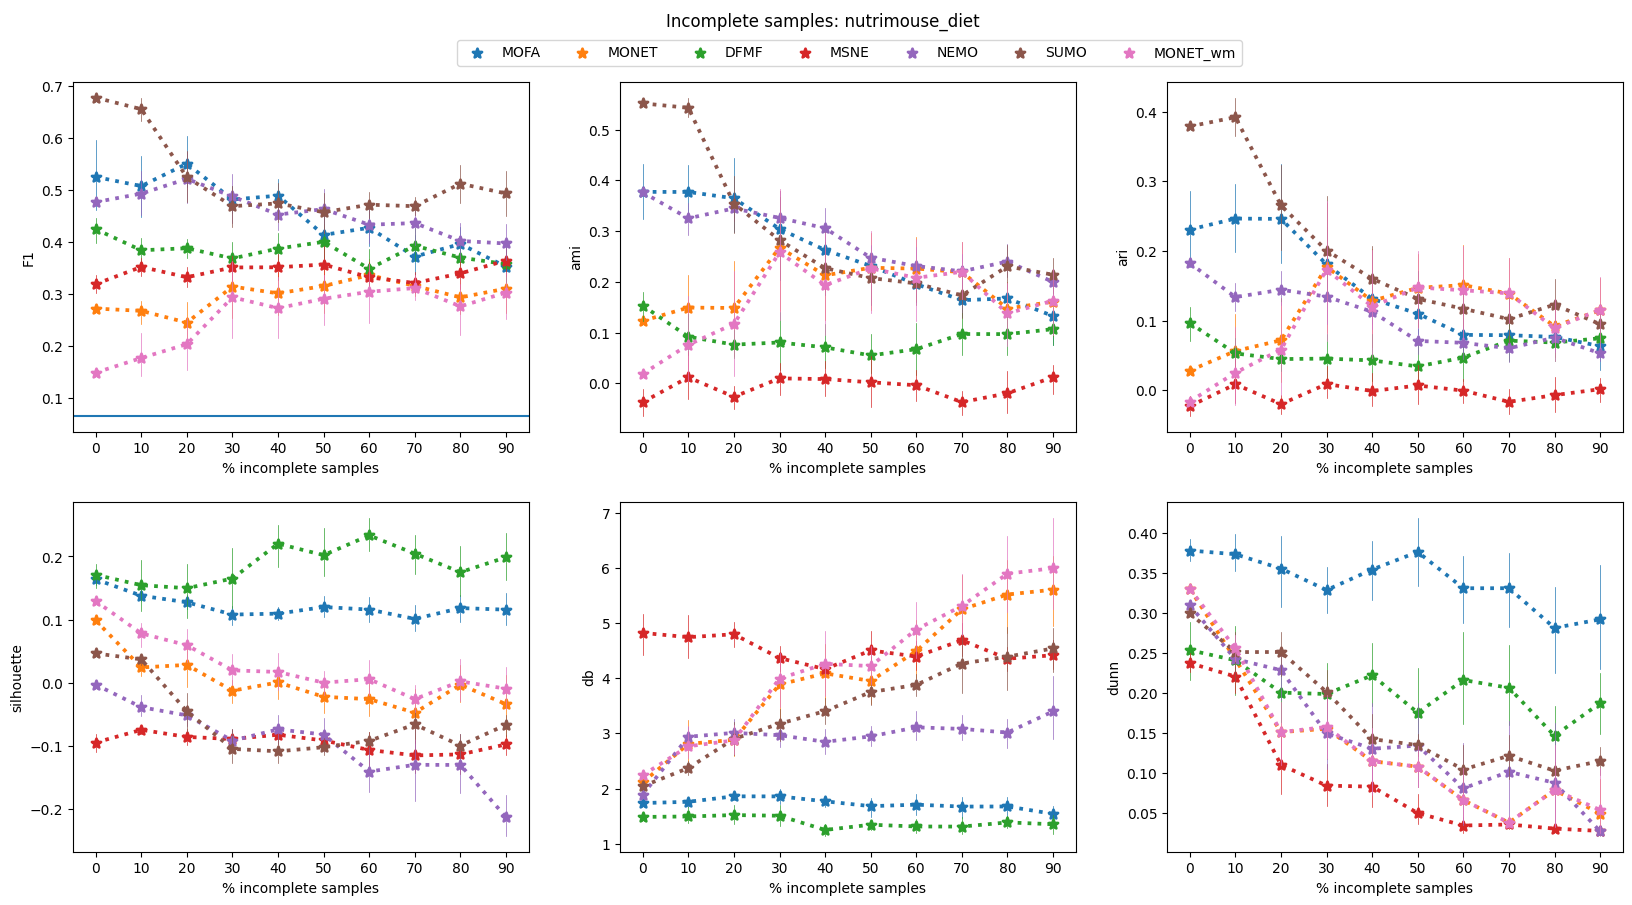

In [6]:
dataset_name = "nutrimouse_diet"
dataset_results = results[results["dataset"] == dataset_name]
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows,ncols, figsize = (20, 10))
fig.suptitle(f"Incomplete samples: {dataset_name}", y= 0.95)
for metric, ax in zip(metrics, axes.flatten()):
    sns.pointplot(data= dataset_results, x= "% incomplete samples", y= metric, hue= "alg", seed= 42, errwidth= 0.5, ax = ax, linestyles= "dotted", markers= "*")
    if metric == "ACC":
        ax.axhline(dataset_results["random_acc"].iloc[0])
    elif metric == "F1":
        ax.axhline(dataset_results["random_f1"].iloc[0])
fig.legend(*ax.get_legend_handles_labels(), ncol=dataset_results["alg"].nunique(), loc= [0.28,0.927])
[[c.get_legend().remove() for c in ax if c.get_legend() is not None] for ax in axes]
plt.show()

## Complete multiview algorithms

### Only complete samples

In [7]:
filelame = "complete_algorithms_evaluation.csv"
file_path = os.path.join(folder_name, filelame)
results = pd.read_csv(file_path)
print("results", results.shape)
results.head()

results (780, 44)


,alg,dataset,n_samples,% incomplete samples,time,execution,ACC,MCC,F1,precision,...,sub_completeness,sub_silhouette,sub_vrc,sub_db,sub_dunn,sub_random_acc,sub_random_f1,sub_label_sizes,sub_relative_label_sizes,comments
0,Concat,nutrimouse_genotype,40,0,0.029821,0,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Concat,nutrimouse_genotype,40,0,0.018355,1,0.600,0.204124,0.555556,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Concat,nutrimouse_genotype,40,0,0.017771,2,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Concat,nutrimouse_genotype,40,0,0.017580,3,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Concat,nutrimouse_genotype,40,0,0.017735,4,0.600,0.204124,0.555556,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
results = results[results["only_complete_samples"] == True]
print("results", results.shape)
results.head()

results (380, 44)


,alg,dataset,n_samples,% incomplete samples,time,execution,ACC,MCC,F1,precision,...,sub_completeness,sub_silhouette,sub_vrc,sub_db,sub_dunn,sub_random_acc,sub_random_f1,sub_label_sizes,sub_relative_label_sizes,comments
0,Concat,nutrimouse_genotype,40,0,0.029821,0,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Concat,nutrimouse_genotype,40,0,0.018355,1,0.600,0.204124,0.555556,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Concat,nutrimouse_genotype,40,0,0.017771,2,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Concat,nutrimouse_genotype,40,0,0.017580,3,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Concat,nutrimouse_genotype,40,0,0.017735,4,0.600,0.204124,0.555556,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for alg in results["alg"].unique():
    complete_results = results[results["alg"] == alg]
    complete0_results = complete_results[complete_results["% incomplete samples"] == 0]
    complete0_results.loc[:, "alg"] = f"{alg}_all"
    results = pd.concat([results, complete0_results])
    complete_results = complete_results[complete_results["% incomplete samples"] != 0]
    complete_results.loc[:, metrics] = complete_results.loc[:, [f"sub_{i}" for i in metrics]].values
    complete_results.loc[:, "alg"] = f"{alg}_all"
    results = pd.concat([results, complete_results])
print("results", results.shape)

results (760, 44)


#### Nutrimouse genotype

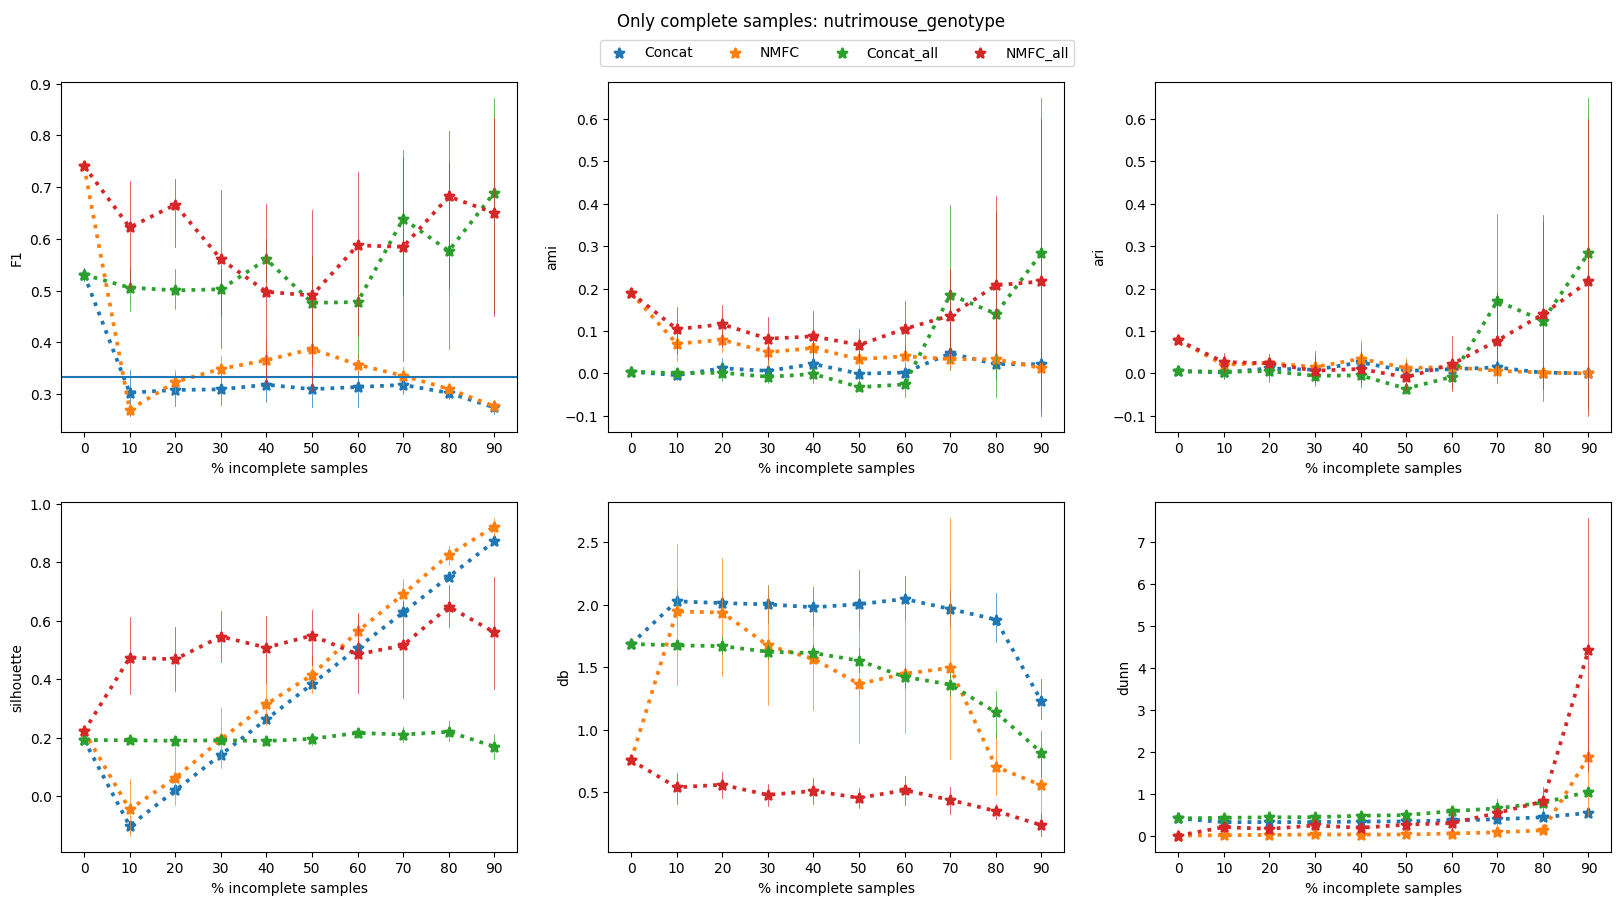

In [10]:
dataset_name = "nutrimouse_genotype"
dataset_results = results[results["dataset"] == dataset_name]
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows,ncols, figsize = (20, 10))
fig.suptitle(f"Only complete samples: {dataset_name}", y= 0.95)
for metric, ax in zip(metrics, axes.flatten()):
    sns.pointplot(data= dataset_results, x= "% incomplete samples", y= metric, hue= "alg", seed= 42, errwidth= 0.5, ax = ax, linestyles= "dotted", markers= "*")
    if metric == "ACC":
        ax.axhline(dataset_results["random_acc"].iloc[0])
    elif metric == "F1":
        ax.axhline(dataset_results["random_f1"].iloc[0])
fig.legend(*ax.get_legend_handles_labels(), ncol=dataset_results["alg"].nunique(), loc= [0.37,0.927])
[[c.get_legend().remove() for c in ax if c.get_legend() is not None] for ax in axes]
plt.show()

#### Nutrimouse diet

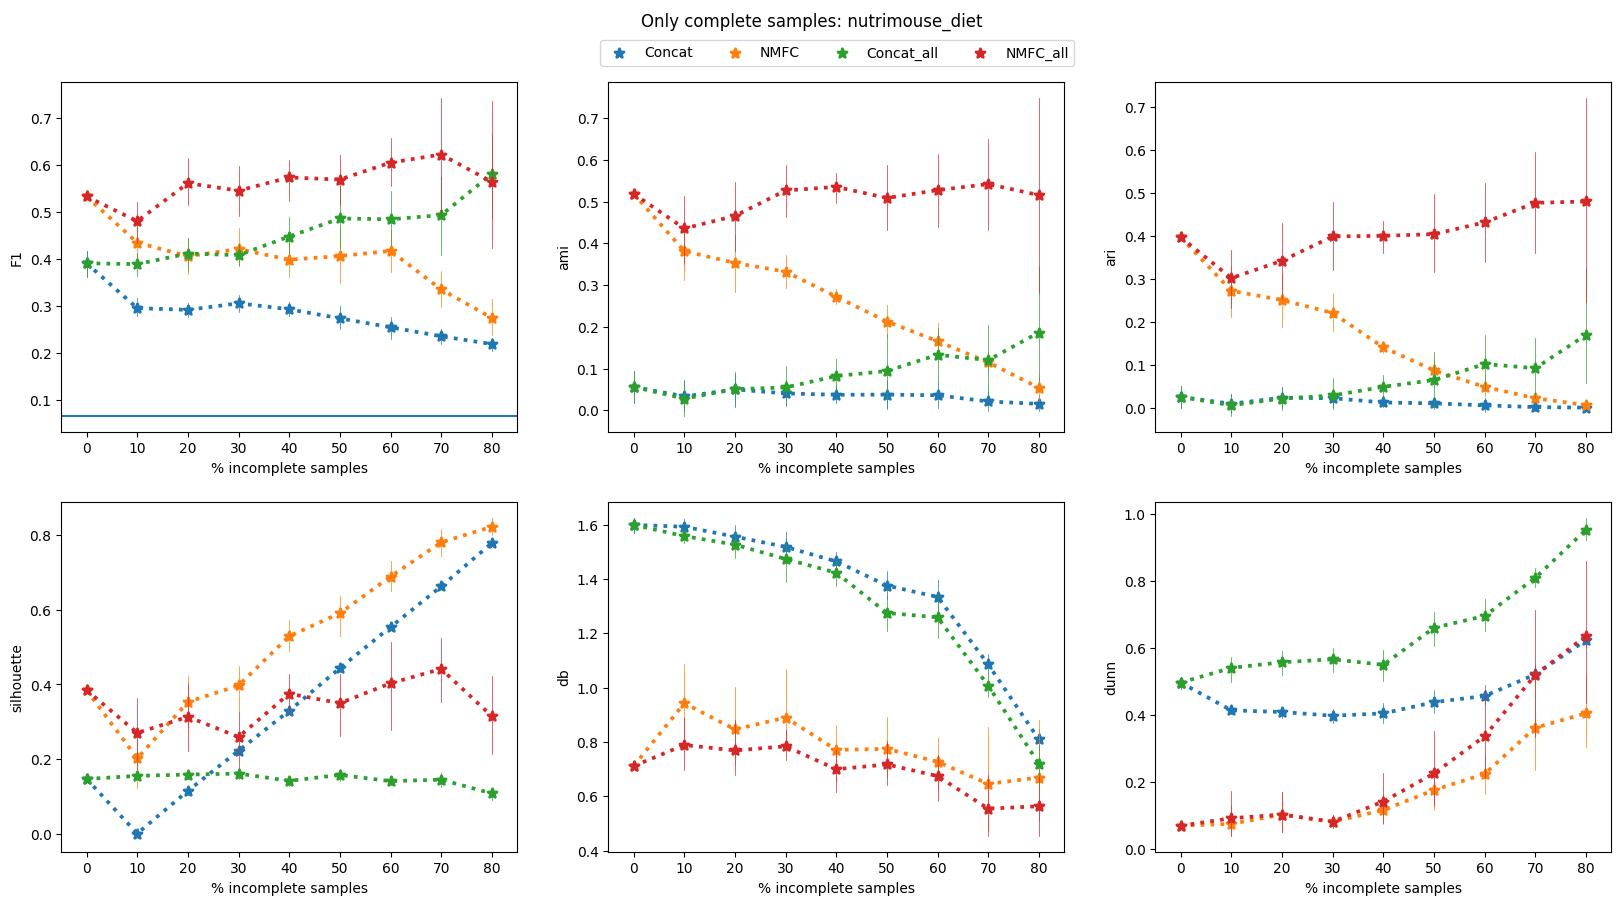

In [11]:
dataset_name = "nutrimouse_diet"
dataset_results = results[results["dataset"] == dataset_name]
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows,ncols, figsize = (20, 10))
fig.suptitle(f"Only complete samples: {dataset_name}", y= 0.95)
for metric, ax in zip(metrics, axes.flatten()):
    sns.pointplot(data= dataset_results, x= "% incomplete samples", y= metric, hue= "alg", seed= 42, errwidth= 0.5, ax = ax, linestyles= "dotted", markers= "*")
    if metric == "ACC":
        ax.axhline(dataset_results["random_acc"].iloc[0])
    elif metric == "F1":
        ax.axhline(dataset_results["random_f1"].iloc[0])
fig.legend(*ax.get_legend_handles_labels(), ncol=dataset_results["alg"].nunique(), loc= [0.37,0.927])
[[c.get_legend().remove() for c in ax if c.get_legend() is not None] for ax in axes]
plt.show()

### Filled incomplete samples

In [12]:
filelame = "complete_algorithms_evaluation.csv"
file_path = os.path.join(folder_name, filelame)
results = pd.read_csv(file_path)
print("results", results.shape)
results.head()

results (780, 44)


,alg,dataset,n_samples,% incomplete samples,time,execution,ACC,MCC,F1,precision,...,sub_completeness,sub_silhouette,sub_vrc,sub_db,sub_dunn,sub_random_acc,sub_random_f1,sub_label_sizes,sub_relative_label_sizes,comments
0,Concat,nutrimouse_genotype,40,0,0.029821,0,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Concat,nutrimouse_genotype,40,0,0.018355,1,0.600,0.204124,0.555556,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Concat,nutrimouse_genotype,40,0,0.017771,2,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Concat,nutrimouse_genotype,40,0,0.017580,3,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Concat,nutrimouse_genotype,40,0,0.017735,4,0.600,0.204124,0.555556,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
results = results[results["only_complete_samples"] == False]
print("results", results.shape)
results.head()

results (400, 44)


,alg,dataset,n_samples,% incomplete samples,time,execution,ACC,MCC,F1,precision,...,sub_completeness,sub_silhouette,sub_vrc,sub_db,sub_dunn,sub_random_acc,sub_random_f1,sub_label_sizes,sub_relative_label_sizes,comments
10,Concat,nutrimouse_genotype,40,0,0.017688,0,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Concat,nutrimouse_genotype,40,0,0.017432,1,0.600,0.204124,0.555556,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Concat,nutrimouse_genotype,40,0,0.017637,2,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Concat,nutrimouse_genotype,40,0,0.017418,3,0.575,0.154919,0.514286,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Concat,nutrimouse_genotype,40,0,0.099240,4,0.600,0.204124,0.555556,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Nutrimouse genotype

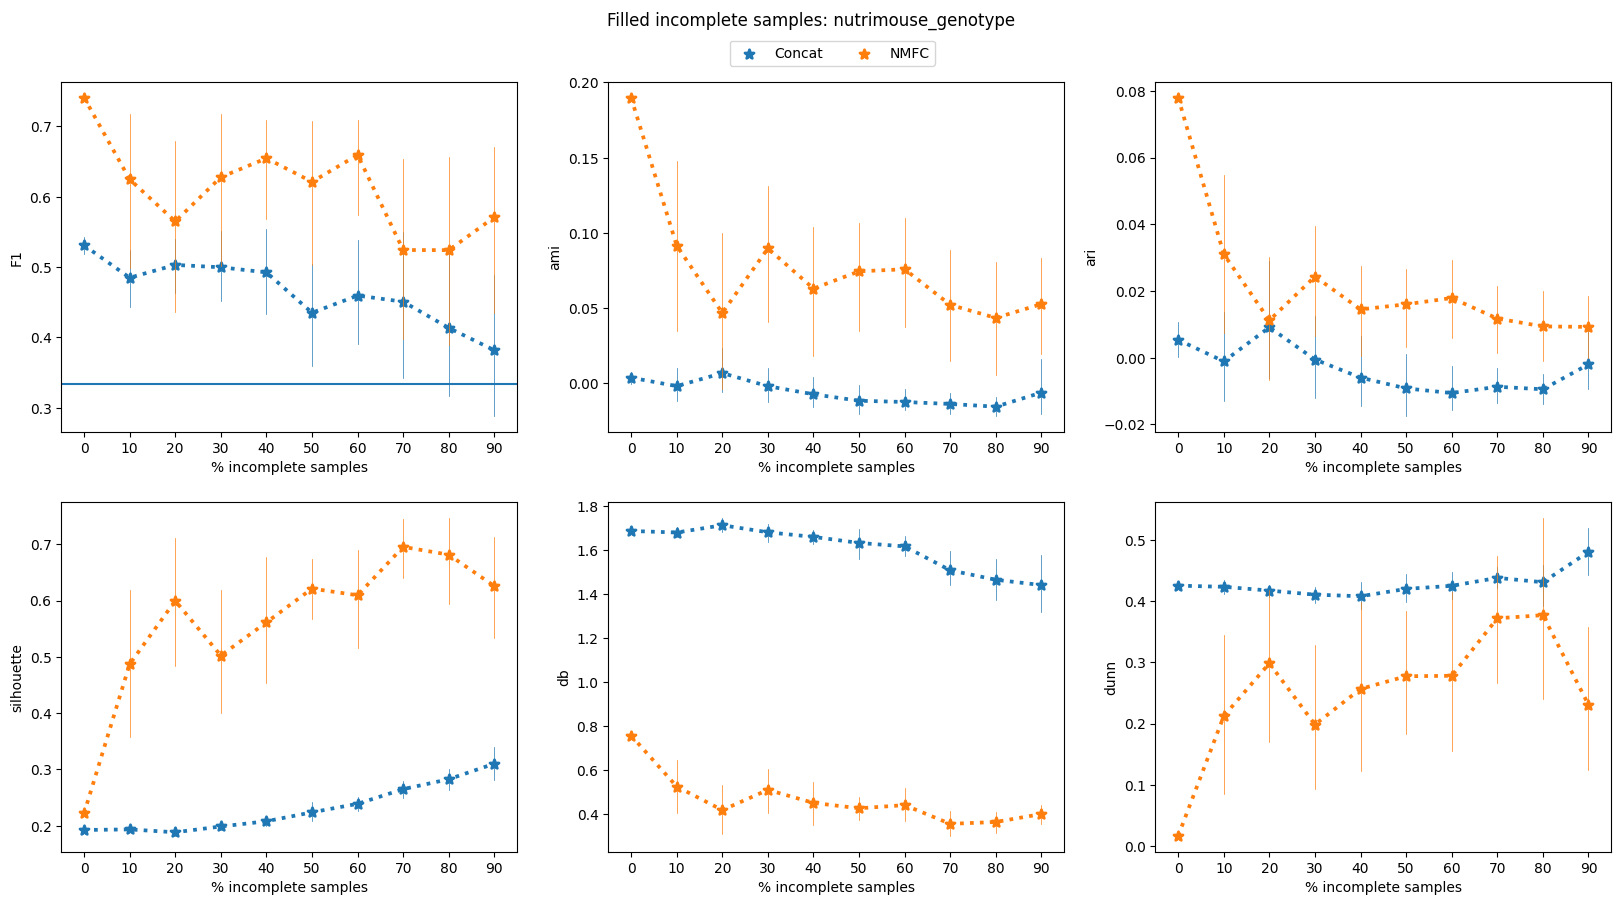

In [14]:
dataset_name = "nutrimouse_genotype"
dataset_results = results[results["dataset"] == dataset_name]
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows,ncols, figsize = (20, 10))
fig.suptitle(f"Filled incomplete samples: {dataset_name}", y= 0.95)
for metric, ax in zip(metrics, axes.flatten()):
    sns.pointplot(data= dataset_results, x= "% incomplete samples", y= metric, hue= "alg", seed= 42, errwidth= 0.5, ax = ax, linestyles= "dotted", markers= "*")
    if metric == "ACC":
        ax.axhline(dataset_results["random_acc"].iloc[0])
    elif metric == "F1":
        ax.axhline(dataset_results["random_f1"].iloc[0])
fig.legend(*ax.get_legend_handles_labels(), ncol=dataset_results["alg"].nunique(), loc= [0.45,0.927])
[[c.get_legend().remove() for c in ax if c.get_legend() is not None] for ax in axes]
plt.show()

#### Nutrimouse diet

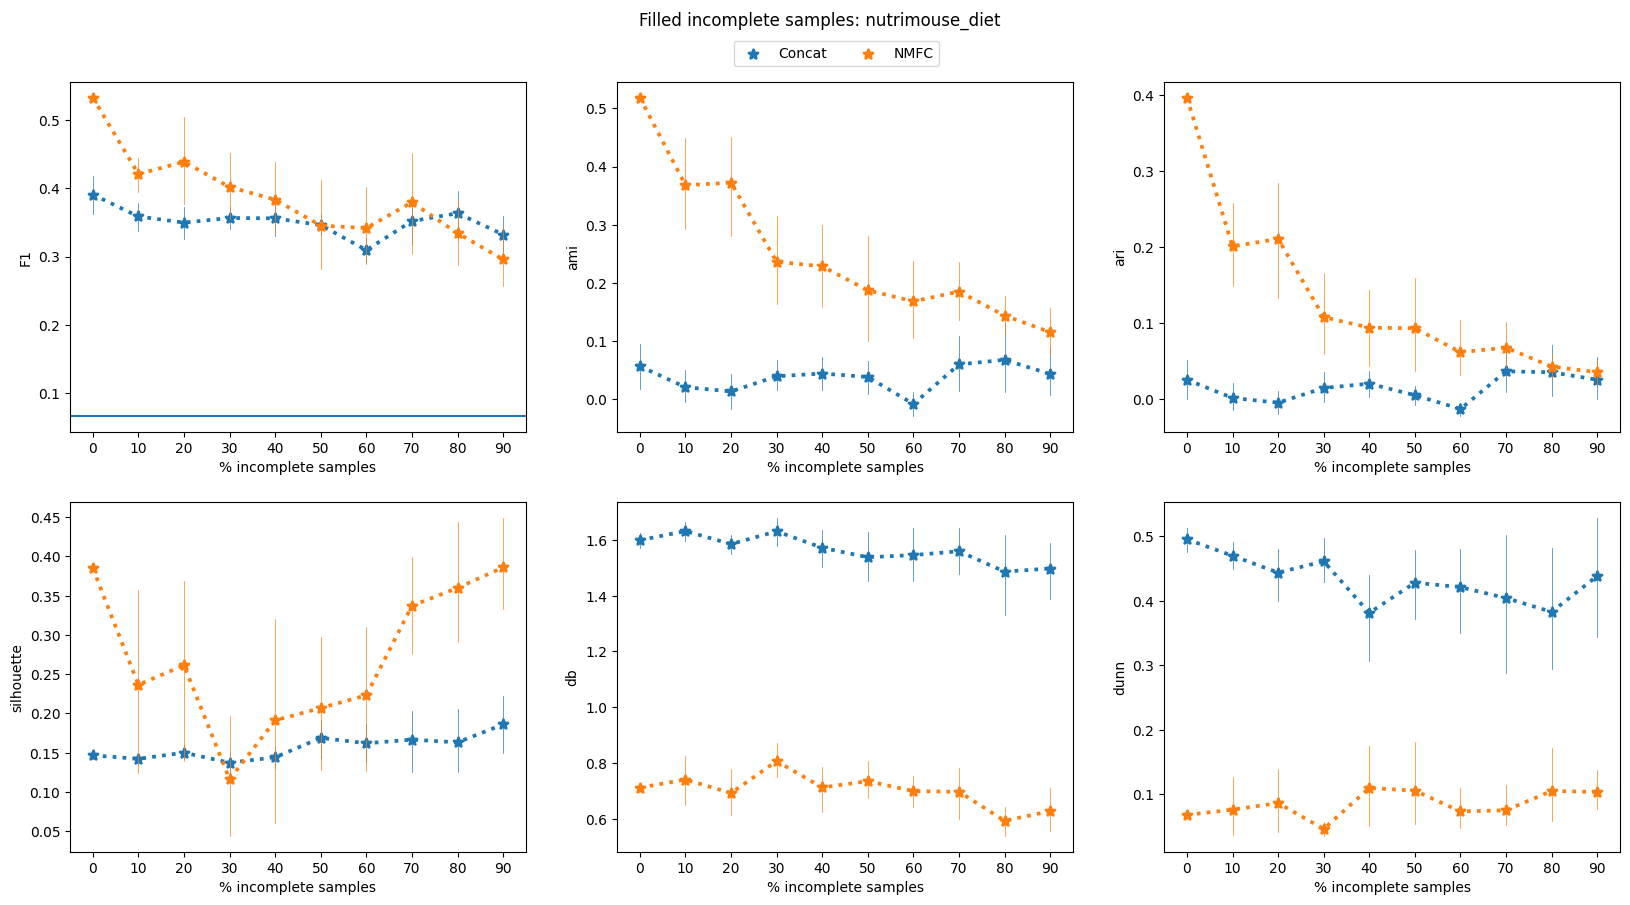

In [15]:
dataset_name = "nutrimouse_diet"
dataset_results = results[results["dataset"] == dataset_name]
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows,ncols, figsize = (20, 10))
fig.suptitle(f"Filled incomplete samples: {dataset_name}", y= 0.95)
for metric, ax in zip(metrics, axes.flatten()):
    sns.pointplot(data= dataset_results, x= "% incomplete samples", y= metric, hue= "alg", seed= 42, errwidth= 0.5, ax = ax, linestyles= "dotted", markers= "*")
    if metric == "ACC":
        ax.axhline(dataset_results["random_acc"].iloc[0])
    elif metric == "F1":
        ax.axhline(dataset_results["random_f1"].iloc[0])
fig.legend(*ax.get_legend_handles_labels(), ncol=dataset_results["alg"].nunique(), loc= [0.45,0.927])
[[c.get_legend().remove() for c in ax if c.get_legend() is not None] for ax in axes]
plt.show()